In [1]:
# Import python library
import numpy as np
import mne
import matplotlib.pyplot as plt
import os
%matplotlib notebook

In [2]:
folder = 'C:\\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data'

filepath1=os.path.join(folder,'SSVEP1.dat')
filepath2=os.path.join(folder,'SSVEP2.dat')
filepath3=os.path.join(folder,'SSVEP3.dat')
filepath4=os.path.join(folder,'SSVEP4.dat')
filepath5=os.path.join(folder,'SSVEP5.dat')
filepath6=os.path.join(folder,'SSVEP6.dat')

In [3]:
raw1=mne.io.read_raw_curry(filepath1)
raw2=mne.io.read_raw_curry(filepath2)
raw3=mne.io.read_raw_curry(filepath3)
raw4=mne.io.read_raw_curry(filepath4)
raw5=mne.io.read_raw_curry(filepath5)
raw6=mne.io.read_raw_curry(filepath6)

Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP1.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP2.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP3.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP4.ceo...
Leaving device<->head transform as None (no landmarks found)
Event file found. Extracting Annotations from C:\Users\OWNER\Desktop\Arthit Learn to Analysis EEG\SSVEP and EEGnet\Data\SSVEP5.ceo...
Leaving device<->head tra

In [4]:
#pick only eeg
raw1.pick_types(eeg=True)
raw2.pick_types(eeg=True)
raw3.pick_types(eeg=True)
raw4.pick_types(eeg=True)
raw5.pick_types(eeg=True)
raw6.pick_types(eeg=True)

<RawCurry | SSVEP6.dat, 122 x 437500 (437.5 s), ~116 kB, data not loaded>

In [5]:
#apply BP filter and nouch filter
raw1.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw1.filter(l_freq=0.1,h_freq=None,method='iir')

raw2.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw2.filter(l_freq=0.1,h_freq=None,method='iir')

raw3.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw3.filter(l_freq=0.1,h_freq=None,method='iir')

raw4.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw4.filter(l_freq=0.1,h_freq=None,method='iir')

raw5.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw5.filter(l_freq=0.1,h_freq=None,method='iir')

raw6.load_data().notch_filter(np.arange(50,500,50),verbose=False)
raw6.filter(l_freq=0.1,h_freq=None,method='iir')

Reading 0 ... 458499  =      0.000 ...   458.499 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Reading 0 ... 425699  =      0.000 ...   425.699 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after forward-backward)
- Cutoff at 0.10 Hz: -6.02 dB

Reading 0 ... 458499  =      0.000 ...   458.499 secs...
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

IIR filter parameters
---------------------
Butterworth highpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 8 (effective, after fo

<RawCurry | SSVEP6.dat, 122 x 437500 (437.5 s), ~407.3 MB, data loaded>

In [6]:
# Annotation Function
#define duration each events
def find_net_annotation(raw_filted):
    raw=raw_filted
    for ann in range(17):
        raw_filted.annotations.duration[ann]=raw.annotations[ann+1]['onset']-raw.annotations[ann]['onset']
    # delete no need annotation 
    raw_filted.annotations.delete(np.arange(1,len(raw.annotations),2))
    raw_filted.annotations.onset
    #segmentation function
    def segment_eeg_data(start=None,end=None,duration=None,description=None):
        onset=list(np.arange(round(start),round(end),duration))
        return onset,[duration for j in range(len(onset))],[description for i in range(len(onset))]
    
    #declare variable
    onset=raw_filted.annotations.onset
    duration=raw_filted.annotations.duration
    labels=raw_filted.annotations.description
    end=np.round(onset+duration)
    onset_new=[]
    duration_new=[]
    descrip_new=[]
    for on,end,labs in zip(onset,end,labels):
        s,d,p=segment_eeg_data(start=on,end=end,duration=1,description=labs)
        onset_new.append(s)
        duration_new.append(d)
        descrip_new.append(p)
        
    #reshape data
    onset=[]
    duration=[]
    labels=[]
    for re in np.arange(len(onset_new)):
        onset=onset+onset_new[re]
        duration=duration+duration_new[re]
        labels=labels+descrip_new[re]
        
    #create annotation
    my_annot = mne.Annotations(onset=onset,  # in seconds
                               duration=duration,  # in seconds, too
                               description=labels)
    
    #Delete all old annotation
    raw_filted.annotations.delete(np.arange(0,len(raw_filted.annotations),1))
    
    #Set new annotation
    raw_filted.set_annotations(my_annot)
    return raw_filted

In [7]:
raw1=find_net_annotation(raw1.copy())
raw2=find_net_annotation(raw2.copy())
raw3=find_net_annotation(raw2.copy())
raw4=find_net_annotation(raw2.copy())
raw5=find_net_annotation(raw2.copy())
raw6=find_net_annotation(raw2.copy())

## Epoch process 

In [8]:
event1,_id1=mne.events_from_annotations(raw1)
event2,_id2=mne.events_from_annotations(raw2)
event3,_id3=mne.events_from_annotations(raw3)
event4,_id4=mne.events_from_annotations(raw4)
event5,_id5=mne.events_from_annotations(raw5)
event6,_id6=mne.events_from_annotations(raw6)

Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']
Used Annotations descriptions: ['10', '20', '30']


In [9]:
pick_chs=[
 'PO11',
 'PO9',
 'PPO7',
 'PO3',
 'POO7',
 'OI1',
 'POO3',
 'Oz',
 'OI2',
 'POO4',
 'PO2',
 'PPO2',
 'POO8',
 'POO10h',
 'POO12h',
 'PO12',
 'PO10',
 'PPO8']
#pick_chs=['Oz','Cz']

In [10]:
len(pick_chs)

18

In [11]:
event_id={'10Hz':1,
          '20Hz':2,
          '30Hz':3
}

In [12]:
epochs1=mne.Epochs(raw1,event1,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs2=mne.Epochs(raw2,event2,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs3=mne.Epochs(raw3,event3,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs4=mne.Epochs(raw4,event4,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs5=mne.Epochs(raw5,event5,event_id,tmin=-0.1,tmax=1,picks=pick_chs)
epochs6=mne.Epochs(raw6,event6,event_id,tmin=-0.1,tmax=1,picks=pick_chs)

del raw1,raw2,raw3,raw4,raw5,raw6

Not setting metadata
Not setting metadata
273 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
272 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Not setting metadata
Not setting metadata
136 matching events found
Setting base

In [13]:
# epochs1.load_data().filter(l_freq=4,h_freq=45,method='iir')
# epochs2.load_data().filter(l_freq=4,h_freq=45,method='iir')
# epochs3.load_data().filter(l_freq=4,h_freq=45,method='iir')
# epochs4.load_data().filter(l_freq=4,h_freq=45,method='iir')
# epochs5.load_data().filter(l_freq=4,h_freq=45,method='iir')
# epochs6.load_data().filter(l_freq=4,h_freq=45,method='iir')

In [14]:
# epochs1.set_eeg_reference(ref_channels='average',verbose=False)
# epochs2.set_eeg_reference(ref_channels='average',verbose=False)
# epochs3.set_eeg_reference(ref_channels='average',verbose=False)
# epochs4.set_eeg_reference(ref_channels='average',verbose=False)
# epochs5.set_eeg_reference(ref_channels='average',verbose=False)
# epochs6.set_eeg_reference(ref_channels='average',verbose=False)

# epochs1.load_data().set_eeg_reference(ref_channels='average',verbose=False)
# epochs2.load_data().set_eeg_reference(ref_channels='average',verbose=False)
# epochs3.load_data().set_eeg_reference(ref_channels='average',verbose=False)
# epochs4.load_data().set_eeg_reference(ref_channels='average',verbose=False)
# epochs5.load_data().set_eeg_reference(ref_channels='average',verbose=False)
# epochs6.load_data().set_eeg_reference(ref_channels='average',verbose=False)

## Preprocess data 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
## mne decoding library
from mne.decoding import Vectorizer,cross_val_multiscore,get_coef,Scaler

In [16]:
X1=epochs1['20Hz'].get_data()
X2=epochs2['20Hz'].get_data()
X3=epochs3['20Hz'].get_data()
X4=epochs4['20Hz'].get_data()
X5=epochs5['20Hz'].get_data()
X6=epochs6['20Hz'].get_data()

y1=epochs1['20Hz'].events[:,-1]
y2=epochs2['20Hz'].events[:,-1]
y3=epochs3['20Hz'].events[:,-1]
y4=epochs4['20Hz'].events[:,-1]
y5=epochs5['20Hz'].events[:,-1]
y6=epochs6['20Hz'].events[:,-1]

del epochs2,epochs3,epochs6,epochs4,epochs5,

Loading data for 92 events and 1101 original time points ...
0 bad epochs dropped
Loading data for 90 events and 1101 original time points ...
0 bad epochs dropped
Loading data for 45 events and 1101 original time points ...
0 bad epochs dropped
Loading data for 45 events and 1101 original time points ...
0 bad epochs dropped
Loading data for 45 events and 1101 original time points ...
0 bad epochs dropped
Loading data for 45 events and 1101 original time points ...
0 bad epochs dropped


In [17]:
#chang y into subjects result
def change_y_into_subject_index(y_data,subject_index):
    for inx in range(len(y_data)):
        y_data[inx]=subject_index
    return y_data

In [18]:
y1=change_y_into_subject_index(y1,1)
y2=change_y_into_subject_index(y2,2)
y3=change_y_into_subject_index(y3,3)
y4=change_y_into_subject_index(y4,4)
y5=change_y_into_subject_index(y5,5)
y6=change_y_into_subject_index(y6,6)

In [19]:
X=np.concatenate((X1,X2,X3,X4,X5,X6),axis=0)
y=np.concatenate((y1,y2,y3,y4,y5,y6),axis=0)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [21]:
scaler=Scaler(epochs1.info)
scaler.fit(X_train,X_train.shape[0])
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

del epochs1

##  EEGnet algorithm

In [22]:
from EEGModels import EEGNet,EEGnet_MindAmpltd
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils as np_utils

In [23]:
kernels,chans,samples=1,X.shape[1],X.shape[2]

In [24]:
class_weigths={0:1, 1:1, 2:1, 3:1,4:1,5:1,6:1}

In [25]:
yc_train = np_utils.to_categorical(y_train-1)
yc_test = np_utils.to_categorical(y_test-1)

In [26]:
#reshape X
Xc_train=X_train.reshape(X_train.shape[0],chans,samples,kernels)
Xc_test=X_test.reshape(X_test.shape[0],chans,samples,kernels)

##  EEGnet Artiht Modifier

In [27]:
#model=EEGNet(nb_classes=6,Chans=chans,Samples=samples,dropoutRate=0.5,kernLength=500,F1=32,D=2,F2=16,dropoutType='Dropout')
# model=EEGnet_MindAmpltd(nb_classes=6,Chans=chans,Samples=samples,dropoutRate=0.5,kernLength=10,F1=25,D=2,F2=50,dropoutType='Dropout')

model=EEGnet_MindAmpltd(nb_classes=6,Chans=chans,Samples=samples,
                        dropoutRate=0.75,norm_rate=0.3,kernLength=250,F1=25,D=2,F2=50,dropoutType='Dropout')

In [28]:
#model.compile(loss='CategoricalCrossentropy',optimizer='adam',metrics='accuracy')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [29]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 18, 1101, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 18, 1101, 25)      6250      
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 1101, 25)      100       
_________________________________________________________________
activation (Activation)      (None, 18, 1101, 25)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 1, 1101, 50)       900       
_________________________________________________________________
batch_normalization_1 (Batch (None, 1, 1101, 50)       200       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1101, 50)      

In [30]:
numParams=model.count_params()

In [31]:
checkpointer=ModelCheckpoint(filepath='weigth_classify_subject.h5',verbose=True,save_best_only=True)

In [32]:
fittedmodel=model.fit(Xc_train,yc_train,batch_size=32,epochs=100,verbose=True,
                      validation_split=0.25,callbacks=[checkpointer],class_weight=class_weigths)

Epoch 1/100
7/7 [==============================] - ETA: 0s - loss: 1.7729 - accuracy: 0.2414
Epoch 00001: val_loss improved from inf to 1.69898, saving model to weigth_classify_subject.h5
7/7 [==============================] - 4s 611ms/step - loss: 1.7729 - accuracy: 0.2414 - val_loss: 1.6990 - val_accuracy: 0.2941
Epoch 2/100
7/7 [==============================] - ETA: 0s - loss: 1.5774 - accuracy: 0.3842
Epoch 00002: val_loss improved from 1.69898 to 1.68511, saving model to weigth_classify_subject.h5
7/7 [==============================] - 4s 586ms/step - loss: 1.5774 - accuracy: 0.3842 - val_loss: 1.6851 - val_accuracy: 0.3382
Epoch 3/100
7/7 [==============================] - ETA: 0s - loss: 1.4487 - accuracy: 0.3645
Epoch 00003: val_loss improved from 1.68511 to 1.62726, saving model to weigth_classify_subject.h5
7/7 [==============================] - 4s 582ms/step - loss: 1.4487 - accuracy: 0.3645 - val_loss: 1.6273 - val_accuracy: 0.4853
Epoch 4/100
7/7 [========================

Epoch 58/100
7/7 [==============================] - ETA: 0s - loss: 1.0364 - accuracy: 0.5369
Epoch 00058: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 583ms/step - loss: 1.0364 - accuracy: 0.5369 - val_loss: 1.4333 - val_accuracy: 0.3824
Epoch 59/100
7/7 [==============================] - ETA: 0s - loss: 0.9715 - accuracy: 0.5616
Epoch 00059: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 577ms/step - loss: 0.9715 - accuracy: 0.5616 - val_loss: 1.4931 - val_accuracy: 0.3971
Epoch 60/100
7/7 [==============================] - ETA: 0s - loss: 0.9810 - accuracy: 0.5517
Epoch 00060: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 585ms/step - loss: 0.9810 - accuracy: 0.5517 - val_loss: 1.4552 - val_accuracy: 0.3824
Epoch 61/100
7/7 [==============================] - ETA: 0s - loss: 0.9705 - accuracy: 0.5665
Epoch 00061: val_loss did not improve from 1.31975
7/7 [============================

Epoch 88/100
7/7 [==============================] - ETA: 0s - loss: 0.9590 - accuracy: 0.5911
Epoch 00088: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 579ms/step - loss: 0.9590 - accuracy: 0.5911 - val_loss: 1.5811 - val_accuracy: 0.3676
Epoch 89/100
7/7 [==============================] - ETA: 0s - loss: 0.9943 - accuracy: 0.5616
Epoch 00089: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 580ms/step - loss: 0.9943 - accuracy: 0.5616 - val_loss: 1.6077 - val_accuracy: 0.3676
Epoch 90/100
7/7 [==============================] - ETA: 0s - loss: 0.9024 - accuracy: 0.6601
Epoch 00090: val_loss did not improve from 1.31975
7/7 [==============================] - 4s 580ms/step - loss: 0.9024 - accuracy: 0.6601 - val_loss: 1.6706 - val_accuracy: 0.3824
Epoch 91/100
7/7 [==============================] - ETA: 0s - loss: 0.9595 - accuracy: 0.5517
Epoch 00091: val_loss did not improve from 1.31975
7/7 [============================

In [33]:
model.load_weights('weigth_classify_subject.h5')

In [34]:
probs=model.predict(Xc_test)
preds=probs.argmax(axis=-1)
acc=np.mean(preds==yc_test.argmax(axis=-1))

In [35]:
acc

0.3956043956043956

In [36]:
preds=preds+1

In [37]:
preds

array([2, 3, 2, 1, 2, 4, 4, 1, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 5, 2, 2, 2, 1, 2, 2, 1, 2, 1, 5, 1, 4, 2, 1, 1, 1, 2, 1, 4, 5,
       3, 1, 2, 3, 5, 2, 1, 2, 5, 1, 2, 1, 1, 2, 2, 2, 1, 5, 5, 2, 2, 1,
       6, 2, 1, 2, 2, 2, 3, 2, 3, 5, 1, 1, 2, 4, 2, 1, 5, 5, 4, 2, 5, 5,
       1, 1, 2], dtype=int64)

In [38]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[24  0  0  0  0  0]
 [ 0 12  2  3  3  0]
 [ 0  7  0  4  4  0]
 [ 0 10  1  0  4  0]
 [ 0  5  0  1  0  1]
 [ 0  7  2  0  1  0]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        24
           2       0.29      0.60      0.39        20
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00        10

    accuracy                           0.40        91
   macro avg       0.22      0.27      0.23        91
weighted avg       0.33      0.40      0.35        91



In [39]:
preds

array([2, 3, 2, 1, 2, 4, 4, 1, 2, 2, 2, 1, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 5, 2, 2, 2, 1, 2, 2, 1, 2, 1, 5, 1, 4, 2, 1, 1, 1, 2, 1, 4, 5,
       3, 1, 2, 3, 5, 2, 1, 2, 5, 1, 2, 1, 1, 2, 2, 2, 1, 5, 5, 2, 2, 1,
       6, 2, 1, 2, 2, 2, 3, 2, 3, 5, 1, 1, 2, 4, 2, 1, 5, 5, 4, 2, 5, 5,
       1, 1, 2], dtype=int64)

## plot History

<IPython.core.display.Javascript object>


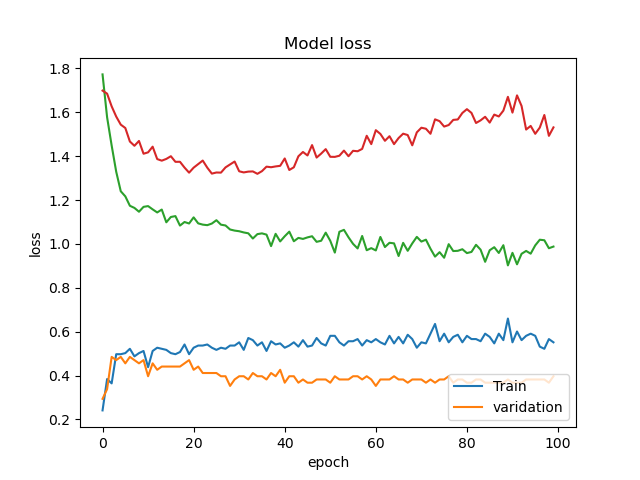

In [40]:
plt.plot(fittedmodel.history['accuracy'])
plt.plot(fittedmodel.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()

In [41]:
#loss
plt.plot(fittedmodel.history['loss'])
plt.plot(fittedmodel.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train','varidation'],loc='lower right')
plt.show()

In [42]:
model.save(filepath='Model_classify_subject.h5',save_format='h5')